# Object recognition


I choose 6 "object" from ["quick,draw!" dataset](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/simplified). and let's create an AI able to recognize them

In [7]:
# first imports...
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



In [2]:
# defining class -> (the famous "object")
class_list = ['angel', 'sword', 'airplane', 'camel', 'diamond', 'lion']

In [5]:
# load datasets for each class
with tf.device('/GPU:0'):

    angel_dataset = pd.read_json('assets/full_simplified_angel.ndjson', lines=True)
    sword_dataset = pd.read_json('assets/full_simplified_sword.ndjson', lines=True)
    airplane_dataset = pd.read_json('assets/full_simplified_airplane.ndjson', lines=True)
    camel_dataset = pd.read_json('assets/full_simplified_camel.ndjson', lines=True)
    diamond_dataset = pd.read_json('assets/full_simplified_diamond.ndjson', lines=True)
    lion_dataset = pd.read_json('assets/full_simplified_lion.ndjson', lines=True)

## A little visualisation

In [8]:
lion_dataset.head()

,word,countrycode,timestamp,recognized,key_id,drawing
0,lion,MX,2017-03-26 03:15:24.261930+00:00,True,5119240698855424,"[[[135, 135], [60, 60]], [[125, 110, 90, 68, 6..."
1,lion,AU,2017-01-27 06:10:19.457510+00:00,True,6258671753363456,"[[[190, 185, 180, 164, 155, 152, 159, 170, 187..."
2,lion,US,2017-03-22 12:36:31.700760+00:00,True,6086914044067840,"[[[124, 106, 89, 69, 44, 32, 29, 29, 43, 67, 9..."
3,lion,RU,2017-01-29 06:39:03.850670+00:00,True,6089213952917504,"[[[47, 73, 69, 86, 80, 81, 111, 101, 117, 119,..."
4,lion,AE,2017-03-28 07:48:11.697990+00:00,True,4692448993345536,"[[[149, 143, 134, 127, 115, 99, 81, 69, 64, 62..."


In [9]:
lion_dataset.transpose()

,0,1,2,3,4,5,6,7,8,9,...,120939,120940,120941,120942,120943,120944,120945,120946,120947,120948
word,lion,lion,lion,lion,lion,lion,lion,lion,lion,lion,...,lion,lion,lion,lion,lion,lion,lion,lion,lion,lion
countrycode,MX,AU,US,RU,AE,US,AE,MY,US,GT,...,US,DE,US,US,US,US,US,IN,US,US
timestamp,2017-03-26 03:15:24.261930+00:00,2017-01-27 06:10:19.457510+00:00,2017-03-22 12:36:31.700760+00:00,2017-01-29 06:39:03.850670+00:00,2017-03-28 07:48:11.697990+00:00,2017-01-27 17:58:16.073330+00:00,2017-03-25 11:26:42.107120+00:00,2017-03-12 04:17:48.583510+00:00,2017-03-10 15:44:35.360280+00:00,2017-01-27 16:23:26.290800+00:00,...,2017-01-30 01:31:52.488950+00:00,2017-01-31 17:04:55.188380+00:00,2017-03-27 14:57:09.238230+00:00,2017-03-27 02:11:05.649810+00:00,2017-03-02 19:13:22.628780+00:00,2017-03-27 05:27:49.915090+00:00,2017-01-27 03:49:58.195990+00:00,2017-03-04 15:03:28.596770+00:00,2017-03-27 23:33:38.055080+00:00,2017-03-02 15:21:23.077170+00:00
recognized,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,False,True,False
key_id,5119240698855424,6258671753363456,6086914044067840,6089213952917504,4692448993345536,4939091638484992,5496238835236864,6496292492541952,6237302743367680,4883616632930304,...,4613991873642496,4630823917584384,6037310225252352,6198233053265920,6480751254044672,4592559059894272,6528998337150976,6529063562772480,6036790332882944,5035177199796224
drawing,"[[[135, 135], [60, 60]], [[125, 110, 90, 68, 6...","[[[190, 185, 180, 164, 155, 152, 159, 170, 187...","[[[124, 106, 89, 69, 44, 32, 29, 29, 43, 67, 9...","[[[47, 73, 69, 86, 80, 81, 111, 101, 117, 119,...","[[[149, 143, 134, 127, 115, 99, 81, 69, 64, 62...","[[[126, 103, 88, 77, 71, 72, 77, 94, 121, 165,...","[[[145, 120, 105, 99, 100, 115, 149, 177, 195,...","[[[60, 68, 84, 100, 118, 137, 145, 151, 157, 1...","[[[195, 174, 149, 120, 99, 82, 77, 86, 102, 12...","[[[132, 89, 76, 70, 68, 72, 90, 108, 121, 146,...",...,"[[[152, 140, 131, 98, 61, 46, 42, 41, 46, 62, ...","[[[128, 177, 173, 171, 168, 163, 145, 140, 142...","[[[124, 109, 99, 80, 73, 64, 64, 69, 85, 123, ...","[[[134, 109, 71, 54, 52, 60, 68, 94, 117, 135,...","[[[203, 173, 157, 154, 154, 168, 188, 198, 210...","[[[171, 162, 158, 148, 153, 174, 190, 205, 218...","[[[36, 36], [117, 117]], [[34, 61], [119, 99]]...","[[[76, 59, 58, 68, 98, 106, 111, 112, 108, 93,...","[[[179, 168, 156, 142, 133, 134, 139, 153, 173...","[[[203, 191, 181, 174, 172], [87, 91, 87, 75, ..."


In [12]:
# merging all dataset
doodles_dataset = angel_dataset.append((sword_dataset, airplane_dataset, camel_dataset, diamond_dataset, lion_dataset))

In [13]:
doodles_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
key_id,799096.0,5.629405e+15,6.504081e+14,4.503604e+15,5.065507e+15,5.629015e+15,6.193350e+15,6.755396e+15


In [14]:
# dropping useless columns
doodles_dataset.drop(axis= 'columns', columns=['countrycode', 'timestamp', 'key_id', 'recognized'], inplace = True)

In [15]:
doodles_dataset.head()

,word,drawing
0,angel,"[[[93, 103, 104, 139, 140, 149, 84], [174, 111..."
1,angel,"[[[128, 116, 99, 87, 77, 75, 80, 90, 114, 130,..."
2,angel,"[[[98, 74, 52, 46, 44, 52, 63, 82, 116, 137, 1..."
3,angel,"[[[140, 153, 174, 183, 210, 224, 227, 228, 221..."
4,angel,"[[[77, 60, 42, 37, 36, 52, 89, 133, 141, 141, ..."


In [17]:
doodles_dataset.isnull().sum()

word       0
drawing    0
dtype: int64

Ok for the little inspection, no missing values. The dataset is clean.

In [19]:
# doodles_dataset['drawing'].iloc[1]

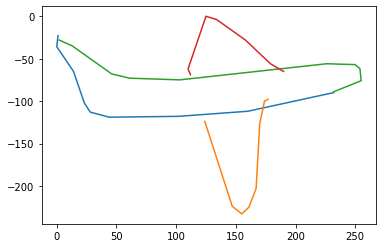

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_doodle(doodle: list):
    for stroke in doodle:
        if not len(stroke) == 2:
            continue
        x_values = stroke[0]
        y_values = -1*np.array(stroke[1]) # y-axis of data is flipped
        plt.plot(x_values, y_values)
        
        
random_number = random.randint(1,doodles_dataset.shape[0])

draw_doodle(doodles_dataset['drawing'].iloc[random_number])

### Processing Data

In [49]:
def doodle_to_raster(doodle: list):
    input_size = 256
    output_size = 64
    raster = np.zeros((output_size, output_size), dtype='uint8')
    for stroke in doodle:
        raster += stroke_to_raster(stroke, input_size, output_size)
    raster = raster.clip(0, 1)
    return raster
            
            
def stroke_to_raster(stroke: list, input_size: int, output_size: int):
    raster = np.zeros((output_size, output_size), dtype='uint8')
    for i in range(0, len(stroke[0])-1):
        start_point = np.array([stroke[0][i], stroke[1][i]])
        start_point = rescale_point(start_point, input_size, output_size)
        end_point = np.array([stroke[0][i+1], stroke[1][i+1]])
        end_point = rescale_point(end_point, input_size, output_size)
        discretised_line = discretise_line(start_point, end_point)
        raster += line_to_raster(discretised_line, output_size)
    return raster
            
            
def line_to_raster(line: list, output_size: int):
    raster = np.zeros((output_size, output_size), dtype='uint8')
    for point_index in range(0, line.shape[0]):
        point = line[point_index, :]
        raster[int(min(output_size-1,point[1])), int(min(output_size-1,point[0]))] = 1
    return raster


def discretise_line(start_point: list, end_point: list):
    points = np.empty((0,2), dtype='uint8')
    discrete_length = calculate_discrete_length(start_point, end_point)
    for step in range(0, discrete_length + 1):
        segment_fraction = 0.0 if discrete_length == 0 else step/float(discrete_length)
        points = np.vstack((points, round_point(interpolate_point(start_point, end_point, segment_fraction))))
    return points
        
    
def calculate_discrete_length(start_point: list, end_point: list):
    start_point = round_point(start_point)
    end_point = round_point(end_point)
    delta_x = end_point[0] - start_point[0]
    delta_y = end_point[1] - start_point[1]
    return max(abs(delta_x), abs(delta_y))


def round_point(point: list):
    return np.array([round(point[0]), round(point[1])])


def rescale_point(point: list, input_size: int, output_size: int):
    factor = float(input_size)/float(output_size)
    return np.array([round(float(point[0])/factor), round(float(point[1])/factor)])


def interpolate_point(start_point: list, end_point: list, segment_fraction: float):
    return np.array([interpolate(start_point[0], end_point[0], segment_fraction), 
                   interpolate(start_point[1], end_point[1], segment_fraction)])

def interpolate(start: float, end: float, segment_fraction: float):
    return start + segment_fraction*(end - start)
    

In [24]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# with tf.device('/GPU:0'):


Num GPUs Available:  1


In [25]:
with tf.device('/GPU:0'):

    preprocessed_angel = angel_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)
    preprocessed_sword = sword_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)
    preprocessed_airplane = airplane_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)
    preprocessed_camel = camel_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)
    preprocessed_diamond = diamond_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)
    preprocessed_lion = lion_dataset['drawing'].iloc[0:10000].apply(doodle_to_raster)

In [26]:
type(preprocessed_angel)

pandas.core.series.Series

In [3]:
labels = {}

for i in range(len(class_list)):
    labels[i] = np.full((10000, 1),i)
    
print(labels[0])

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [29]:
import pickle

pickle.dump( preprocessed_angel, open( "preproc_angel.p", "wb" ) )
pickle.dump( preprocessed_sword, open( "preproc_sword.p", "wb" ) )
pickle.dump( preprocessed_airplane, open( "preproc_airplane.p", "wb" ) )
pickle.dump( preprocessed_camel, open( "preproc_camel.p", "wb" ) )
pickle.dump( preprocessed_diamond, open( "preproc_diamond.p", "wb" ) )
pickle.dump( preprocessed_lion, open( "preproc_lion.p", "wb" ) )

In [4]:
import pickle

preprocessed_list = [
    pickle.load( open( "preproc_angel.p", "rb" ) ),
    pickle.load( open( "preproc_sword.p", "rb" ) ),
    pickle.load( open( "preproc_airplane.p", "rb" ) ),
    pickle.load( open( "preproc_camel.p", "rb" ) ),
    pickle.load( open( "preproc_diamond.p", "rb" ) ),
    pickle.load( open( "preproc_lion.p", "rb" ) )
]


In [8]:
labelized_list = []

for i in range(len(preprocessed_list)):
    
    elem = pd.DataFrame(preprocessed_list[i])
    elem.insert(1, "label", labels[i])
    labelized_list.append(elem)


In [9]:
labelized_list[0].shape

(10000, 2)

In [10]:
preprocessed_dataset = labelized_list[0]

for i in range(1, len(labelized_list)):
    preprocessed_dataset = preprocessed_dataset.append(labelized_list[i])
    print(preprocessed_dataset.shape)

(20000, 2)
(30000, 2)
(40000, 2)
(50000, 2)
(60000, 2)


In [11]:
type(preprocessed_dataset)

pandas.core.frame.DataFrame

### Splitting Dataset

In [12]:
from sklearn.model_selection import train_test_split

# tensorflow does not accepts numpy arrays of numpy arrays, but wants a 4D tensor with (n_images, width, height, colour_depth)
drawings = np.stack(preprocessed_dataset['drawing'].to_numpy()).reshape(60000, 64, 64, 1)

train_drawings, test_drawings, train_labels, test_labels = train_test_split(drawings, 
                                                                            preprocessed_dataset['label'],
                                                                            test_size=0.2, random_state=42, shuffle=True)

### Composing model

In [13]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

# pixel width and height of our images
input_size = 64
kernel_size = (5,5)


Num GPUs Available:  1


In [42]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size = kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, kernel_size = kernel_size, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, kernel_size = kernel_size, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size = kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(128, kernel_size = kernel_size, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size = kernel_size, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten()) # 2d to 1d

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 60, 60, 32)        832       
_________________________________________________________________
dropout_72 (Dropout)         (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 56, 56, 32)        25632     
_________________________________________________________________
batch_normalization_40 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 52, 52, 64)        51264     
_________________________________________________________________
dropout_73 (Dropout)         (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 48, 48, 64)      

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
with tf.device('/GPU:0'):

    history = model.fit(train_drawings, train_labels, epochs=12, 
                        validation_data=(test_drawings, test_labels))

Epoch 1/12
1500/1500 [==============================] - 69s 45ms/step - loss: 1.8202 - accuracy: 0.3485 - val_loss: 0.9926 - val_accuracy: 0.6019
Epoch 2/12
1500/1500 [==============================] - 73s 49ms/step - loss: 0.9937 - accuracy: 0.6382 - val_loss: 0.8210 - val_accuracy: 0.7529
Epoch 3/12
1500/1500 [==============================] - 68s 45ms/step - loss: 0.7287 - accuracy: 0.7731 - val_loss: 0.5805 - val_accuracy: 0.8527
Epoch 4/12
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5406 - accuracy: 0.8426 - val_loss: 0.3272 - val_accuracy: 0.9099
Epoch 5/12
1500/1500 [==============================] - 68s 45ms/step - loss: 0.4316 - accuracy: 0.8785 - val_loss: 0.3287 - val_accuracy: 0.9110
Epoch 6/12
1500/1500 [==============================] - 68s 45ms/step - loss: 0.3982 - accuracy: 0.8929 - val_loss: 0.3583 - val_accuracy: 0.9091
Epoch 7/12
1500/1500 [==============================] - 68s 45ms/step - loss: 0.3603 - accuracy: 0.9055 - val_loss: 0.2641 -

375/375 - 4s - loss: 0.2184 - accuracy: 0.9383


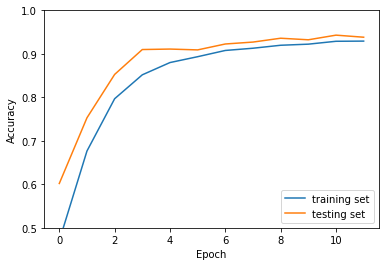

In [45]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_drawings,  test_labels, verbose=2)

### Testing the model

In [46]:
class LineDrawer:
    
    def __init__(self, canvas, input_size, output_size = 256, brush_size = 3, line_colour = "#476042"):
        self.canvas = canvas
        self.drawing = []
        self.mouse_is_clicked = False
        self.brush_size = brush_size
        self.line_colour = line_colour
        self.active_stroke = [[],[]]
        self.scale_factor = float(output_size)/float(input_size)

    def on_motion(self, event):
        if not self.mouse_is_clicked:
            return
        x1, y1 = (event.x - self.brush_size), (event.y - self.brush_size)
        x2, y2 = (event.x + self.brush_size), (event.y + self.brush_size)
        self.canvas.create_oval(x1, y1, x2, y2, fill=self.line_colour)
        self.write_to_stroke([event.x*self.scale_factor, event.y*self.scale_factor])

    def on_down_press(self, event):
        self.mouse_is_clicked = True

    def on_release(self, event):
        self.mouse_is_clicked = False
        self.finish_stroke()
        
    def finish_stroke(self):
        self.drawing.append(self.active_stroke)
        self.active_stroke = [[],[]]

    def write_to_stroke(self, point: list):
        self.active_stroke[0].append(round(point[0]))
        self.active_stroke[1].append(round(point[1]))
    

In [47]:
import tkinter as tk

# run this cell to get a drawing interface!
gui = tk.Tk()
canvas_size = 512
canvas = tk.Canvas(gui, width=canvas_size, height=canvas_size)
line_drawer = LineDrawer(canvas, canvas_size)
canvas.bind('<Motion>', line_drawer.on_motion)
canvas.bind('<Button-1>', line_drawer.on_down_press)
canvas.bind('<ButtonRelease-1>', line_drawer.on_release)
canvas.pack()
gui.mainloop()

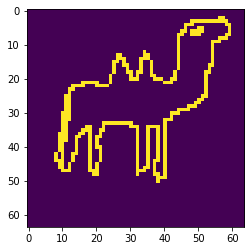

In [50]:
plt.imshow(doodle_to_raster(line_drawer.drawing))

In [51]:
drawing_input = doodle_to_raster(line_drawer.drawing).reshape(1, 64, 64, 1)

model.predict(drawing_input)

array([[8.4137486e-10, 6.0511110e-12, 6.3694536e-15, 9.9999702e-01,
        2.6580479e-10, 2.9645123e-06]], dtype=float32)

In [52]:
model.save('recognition.h5')